In [1]:
# https://www.math.utah.edu/~zhorvath/ar1.pdf

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [18]:
# Read
data = np.load('./timeseriesdata.npy').item()
print( data.keys() )

dict_keys(['ICNSA.csv', 'Tfrigo.csv', 'PRS30006013.csv', 'DEXUSEU.csv', 'DCOILBRENTEU.csv', 'JTSQUL.csv', 'TTLCONS.csv', 'PLAMBUSDM.csv'])


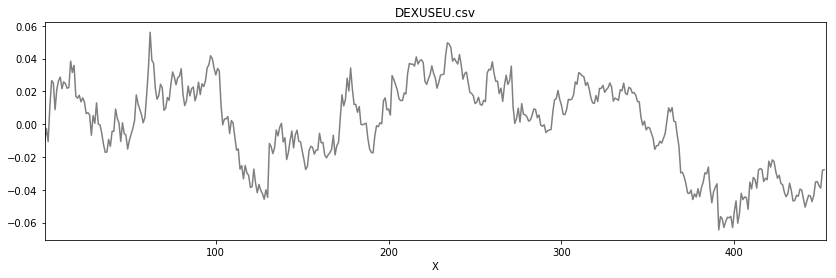

In [10]:
#key = 'Tfrigo.csv'
#key = 'DCOILBRENTEU.csv'
key = 'DEXUSEU.csv'

X, Y = data[key]

Y = Y[800:]
Y = Y - np.mean( Y )

plt.figure(figsize=(14, 4) )
plt.plot(  Y,  'k-', alpha=0.5 );
plt.xlabel( 'X' ); plt.title(key); plt.xlim([1, len(Y)]);

In [11]:
# regression linéaire:
def regres(X, Y):
    a, b =  np.polyfit( X, Y, 1, full=False)
    
    Yfit = a*X + b
    SCR = np.sum( (Y-Yfit )**2 ) #somme des carrés des résidu
    
    return a, b, Yfit, SCR

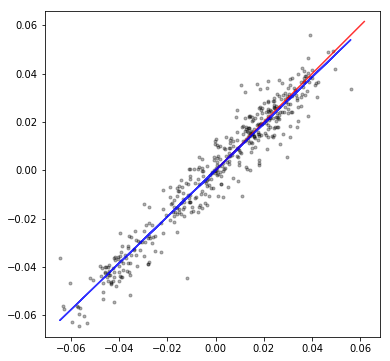

In [12]:
i = 1

Y1 = Y[:-i]
Y0 = Y[i:]

x_diag = [0,  1.1*max(Y) ]

a, b, Y1fit, scr = regres(Y0, Y1)

plt.figure(figsize=(6, 6) )

plt.plot(  Y0, Y1,  '.k', alpha=0.3 );
plt.plot(  x_diag, x_diag,  '-r', alpha=0.8 );
plt.plot(  Y0, Y1fit,  '-b', alpha=0.8 );

plt.xlim(x_diag); plt.ylim(x_diag );
plt.axis('equal');


In [14]:
print( a, b)

0.964689814079 3.33310671661e-05


-4.45194520383e-19


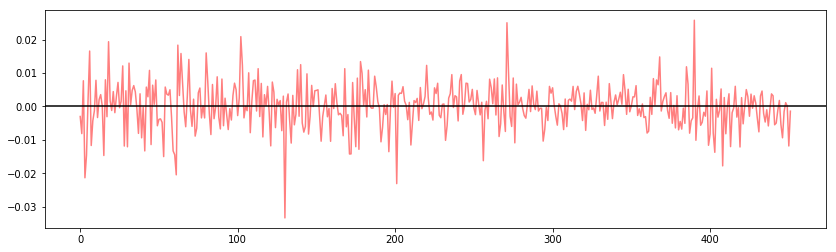

In [17]:
residu = Y1-Y1fit
plt.figure(figsize=(14, 4) )
plt.plot(  residu,  'r-', alpha=0.5 );
plt.axhline(y=np.mean(residu), color='k', linestyle='-');

print( np.mean(residu))

In [52]:
def rhoEstimate( Y ):
    
    Y1 = Y[:-1]
    Y0 = Y[1:]
    
    rho = np.sum( Y1*Y0 )/np.sum( Y1**2 )
    
    return rho

        

In [53]:
rhoEstimate( Y )

0.96387378658738709

## Systeme amortisseur ressort

Est-ce que le modèle AR(1) est équivalent à un filtrage par un système ressort-amortisseur, sans masse (ou RC en équivalent électrique) ?

$$
F_{resort} = -k . y
$$

$$
F_{visqueux} = -\alpha . \dot y 
$$

donc en équilibre statique, $F_{resort} + F_{visqueux} = 0$, avec $\beta = k/\alpha$:
$$
\dot y = -\beta . y
$$
La solution de cette équation est une exponentielle decroissante, avec une constante de temps $1/\beta$:
$$
y_1(t) = c_1.\exp( -\beta.t )
$$

### Dérivée discrète

Pour obtenir une resolution numérique de cette équation, il convient de discretisé la derivée, avec un schéma ici implicite ($y_{i}$):

$$
y_i - y_{i-1} = -dt.\beta.y_{i}
$$

on obtient la relation de recurrence suivante :

$$
y_i = \frac{1}{1+dt.\beta}y_{i-1}
$$

```
Remarque: quand $dt.\beta$ est proche de zero, on retrouve la formule issus d'un schéma explicite (DL).
```

In [112]:
bruit = np.random.normal(loc=0.0, scale=1.0, size=(200))

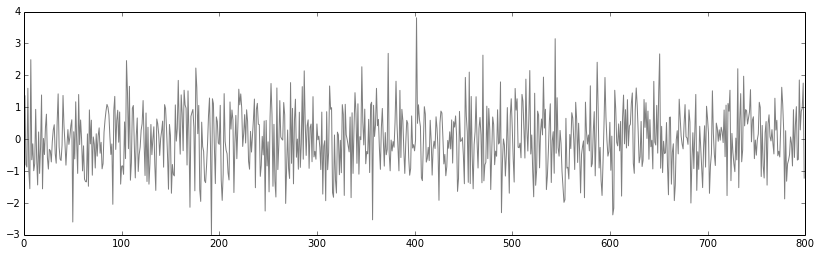

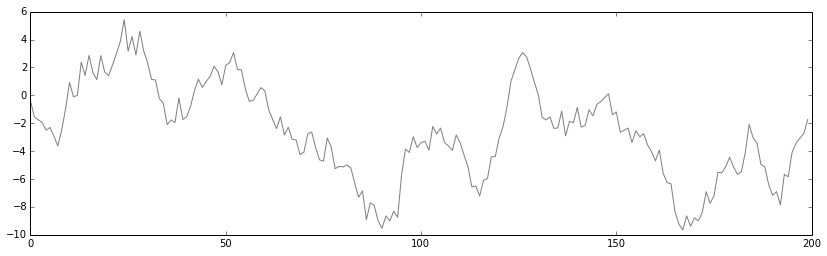

In [113]:
plt.figure(figsize=(14, 4) )
#plt.stem(  y_bruit, bottom=0,  alpha=0.5, color='k');
plt.plot(  y_bruit , alpha=0.5, color='k');


plt.figure(figsize=(14, 4) )
plt.plot(  np.cumsum( bruit ), '-k' ,alpha=0.5 );


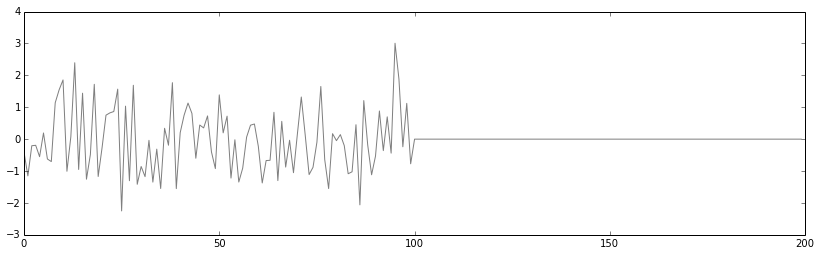

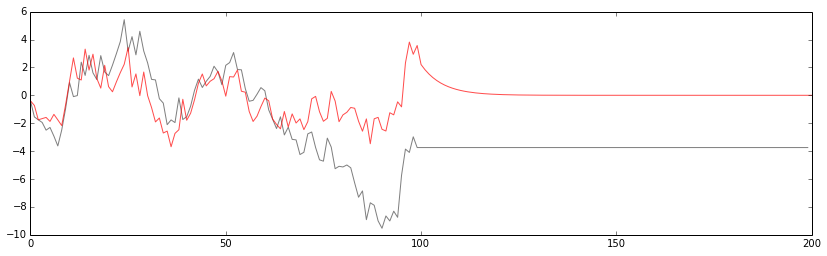

In [121]:
tau = 5

eta = float( tau )/( 1.0+tau )

bruit[100:] = 0

Y = [bruit[0]]
for eps in bruit:
    y_plus = eta*Y[-1] + eps
    Y.append( y_plus )
    

plt.figure(figsize=(14, 4) )
plt.plot(  bruit, '-k', alpha=0.5 );

plt.figure(figsize=(14, 4) )
plt.plot(  np.cumsum( bruit ), '-k', alpha=0.5 );
plt.plot(  Y, '-r', alpha=0.7 );